# Metropolis-Hastings Algorithm

*Markov Chain Monte Carlo (MCMC) method*

### Algorithm Steps:

1. **Initialization**: I have to choose an initial state or sample from the distribution to sample from -> $x_0$.

2. **Proposal**: at each iteration $t$ I have to propose a new candidate state or sample $x^*$ by choosing a new sample from a proposal distribution (for example a symmetric distribution centered around the current state $x_t$).

3. **Evaluation**: I have to evaluate the acceptance probability for the proposed state by computing the ratio of the pdf of the proposed state to the pdf of the current state. But since the proposal distribution is often symmetric, this ratio simplifies to the ratio of the target distribution evaluated at the proposed state to the target distribution evaluated at the current state: $\alpha=\min\left(1,\frac{p(x^*)}{p(x_t)}\right)$.

    **N.B.**: if the proposal distribution is not symmetric, the acceptance probability is $\alpha=\min\left(1,\frac{p(x^*)q(x_t|x^*)}{p(x_t)q(x^*|x_t)}\right)$, where
    - $p(x_t)$ is the probability of the current state.
    - $p(x^*)$ is the probability of the proposed state.
    - $q(x_t|x^*)$ is the probability of proposing state $x_t$ given that the current state is $x^*$.
    - $q(x^*|x_t)$ is the probability of proposing state $x^*$ given that the current state is $x_t$.

4. **Acceptance/Rejection**: I have to generate a random number $u$ from a uniform distribution between 0 and 1 -> 
    - if $ u \leq \alpha $, accept the proposed state $x^*$ and set $x_{t+1}=x^*$;
    - otherwise, reject the proposed state and set $x_{t+1}=x_t$.

5. **Iteration**: then I have to repeat steps 2-4 for a certain number of iterations or until convergence criteria are met.

In [92]:
import sys
sys.path.append("../../")
from pyACC.sampler import Metropolis_Hastings

import numpy as np
import matplotlib.pyplot as plt
import corner #to produce the corner plot

* Distributions

In [93]:
#target distribution (Gaussian)
def target_distribution(x):
    return np.exp(-0.5*x**2)/np.sqrt(2*np.pi)

#proposal distribution (flat)
def proposal_distribution(x):
    return np.ones_like(x)/(2*np.sqrt(2))

#acceptance probability
def acceptance_probability(proposed_state,current_state):
    return min(1,target_distribution(proposed_state)/target_distribution(current_state))

* Algorithm

In [94]:
#generate samples
initial_sample = 0.0
num_samples = 10000
samples,efficiency = Metropolis_Hastings(target_distribution, proposal_distribution, acceptance_probability, initial_sample, num_samples)

* Plot

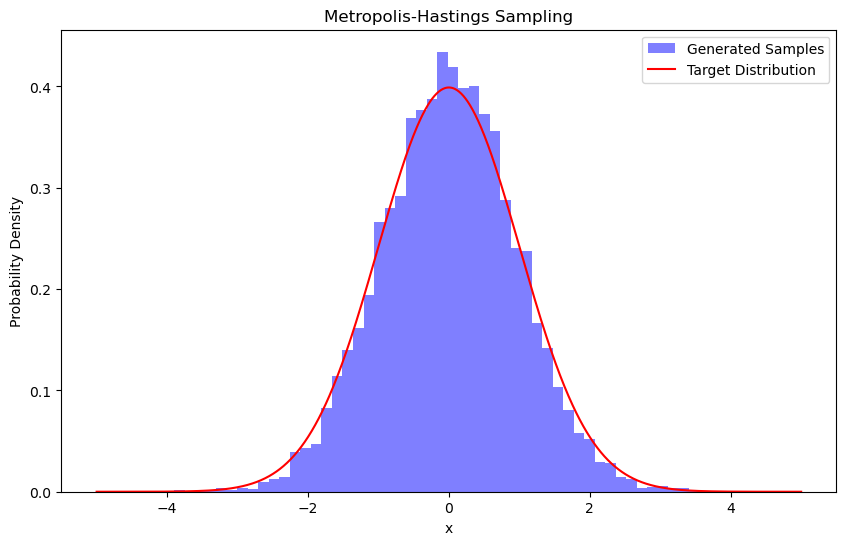

In [95]:
plt.figure(figsize=(10, 6))
plt.hist(samples, bins=50, density=True, alpha=0.5, color='blue', label='Generated Samples')
x = np.linspace(-5, 5, 1000)
plt.plot(x, target_distribution(x), color='red', label='Target Distribution')
plt.title('Metropolis-Hastings Sampling')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

* Efficiency

    $\varepsilon=\frac{n° \ of \ accepted \ samples}{total \ n° \ of \ iterations}$

In [96]:
print("The efficiency is:",efficiency)

The efficiency is: 0.8089


* **Corner plot** that shows *2D scatter plots* and *1D marginalized posteriors*

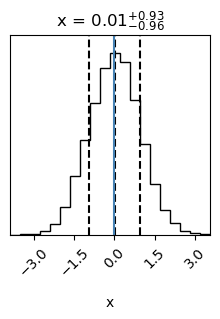

In [97]:
samples_array = np.array(samples) #otherwise I have to install "ArviZ"

#corner plot
figure = corner.corner(samples_array, labels=["x"], truths=[0], quantiles=[0.16, 0.5, 0.84], show_titles=True)
plt.show()

I am generating samples from a univariate Gaussian distribution, so the only parameter of interest is the *mean*, as a consequence the corner plot will only display an histogram for this single parameter.

**-> in order to have more parmeters I will now work with multivariate distributions**

* Distributions

In [98]:
from scipy.stats import multivariate_normal

#multivariate target distribution (2D Gaussian)
mean = [0, 0] #mean vector
covariance = [[1, 0.5], [0.5, 1]] #covariance matrix
target_distribution_2d = multivariate_normal(mean=mean, cov=covariance).pdf
'''
def target_distribution_2d(x):
    x = np.atleast_2d(x)
    return np.exp(-0.5 * np.sum(x**2, axis=1)) / np.sqrt((2 * np.pi) ** len(x[0]))
'''

#proposal distribution (multivariate Gaussian)
proposal_distribution_2d = multivariate_normal(mean=[0, 0], cov=[[1, 0], [0, 1]]).pdf

#acceptance probability
def acceptance_probability_2d(proposed_state,current_state):
    return min(1,target_distribution_2d(proposed_state)/target_distribution_2d(current_state))

* Algorithm

In [99]:
#generate multivariate samples
initial_sample_2d = np.array([0, 0])
num_samples_2d = 100000
samples_2d, efficiency_2d = Metropolis_Hastings(target_distribution_2d, proposal_distribution_2d, acceptance_probability_2d, initial_sample_2d, num_samples_2d)

### Expected Features of Plots

1. **Histograms** (Diagonal Plots)
    - Along the diagonal of the corner plot, there are histograms representing the marginal distributions of each parameter.
    - These histograms show how the values of each parameter are distributed in the samples.
    - Each histogram should have a characteristic shape reflecting the probability density of the corresponding parameter.

2. **Scatter Plots** (Off-Diagonal Plots)
    - Off the diagonal of the corner plot, there are scatter plots representing the joint distributions between pairs of parameters.
    - These scatter plots show how the values of two parameters are related to each other.
    - The scatter plots may exhibit various patterns, such as clusters, lines, or clouds of points, depending on the correlations between the parameters.

* Corner plot

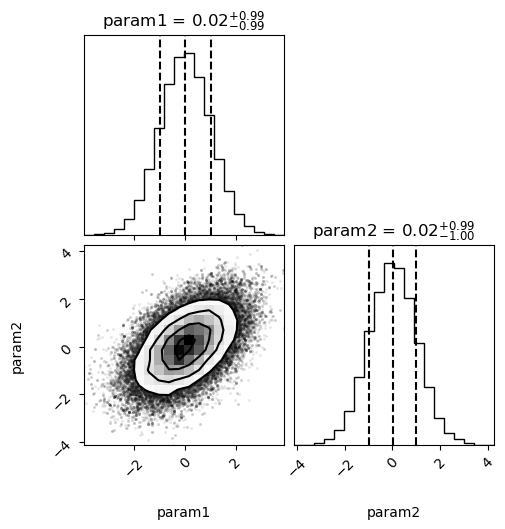

In [100]:
samples_2d_array = np.array(samples_2d)
figure_2d = corner.corner(samples_2d_array, labels=["param1", "param2"], quantiles=[0.16, 0.5, 0.84], show_titles=True)
plt.show()

* Efficiency

In [101]:
print("The efficiency is:", efficiency_2d)

The efficiency is: 0.51003


* Estimation of relevant quantities
    - mean;
    - mode;
    - median;
    - standard deviation;
    - covariance.

In [126]:
#mean
mean_est=np.mean(samples_2d_array,axis=0)

#median
median_est=np.median(samples_2d_array,axis=0)

#standard deviation
std_est=np.std(samples_2d_array,axis=0)

#covariance
covariance_est=np.cov(samples_2d_array,rowvar=False)

print("• Mean:",mean,"(true),",mean_est,"(estimated)")
print("• Median:", median_est,"(estimated)")
print("• Standard Deviation:", std_est,"(estimated)")
print("• Covariance Matrix:",covariance,"(true),",covariance_est,"(estimated)")

• Mean: [0, 0] (true), [0.02105448 0.01310915] (estimated)
• Median: [0.0186962 0.0151642] (estimated)
• Standard Deviation: [1.00024057 1.00594158] (estimated)
• Covariance Matrix: [[1, 0.5], [0.5, 1]] (true), [[1.0004912  0.50479097]
 [0.50479097 1.01192859]] (estimated)


Mode

[[0.24846021]
 [0.69621174]]


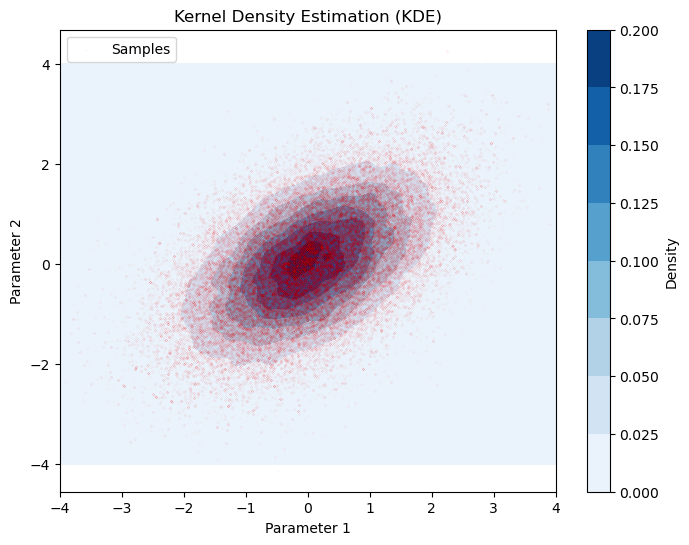

In [124]:
from scipy.stats import gaussian_kde

#KDE for each parameter with adjusted bandwidth
bandwidth = 0.1
kde = gaussian_kde(samples_2d_array.T, bw_method=bandwidth)
print(kde.resample(1))

#visualization of the KDE estimate
x, y = np.meshgrid(np.linspace(-4, 4, 100), np.linspace(-4, 4, 100))
positions = np.vstack([x.ravel(), y.ravel()])
z = np.reshape(kde(positions).T, x.shape)

plt.figure(figsize=(8, 6))
plt.contourf(x, y, z, cmap='Blues')
plt.xlabel('Parameter 1')
plt.ylabel('Parameter 2')
plt.title('Kernel Density Estimation (KDE)')
plt.colorbar(label='Density')
plt.scatter(samples_2d_array[:, 0], samples_2d_array[:, 1], color='red', marker='.', s=0.005, alpha=0.5, label='Samples')
plt.legend()
plt.show()

### Expected Appearance of KDE Plot

1. **Symmetric Contours**: the contours of the KDE plot should be symmetric around the origin $[0, 0]$ due to the symmetry of the Gaussian distribution.

2. **Peak at Mean**: the highest density region of the KDE plot, corresponding to the mode estimate, should be centered around the mean $[0, 0]$ of the distribution.

3. **Smoothness**: the contours should be relatively smooth, reflecting the smooth nature of the Gaussian distribution.

4. **Elliptical Shape**: the contours may exhibit an elliptical shape due to the correlation between the two variables in the Gaussian distribution.

5. **Overlap with Sample Distribution**: the contours should overlap with the distribution of your generated samples, indicating that the KDE estimate captures the underlying distribution of the samples.